In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('lending_train.csv')

In [2]:
import seaborn as sns

In [3]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [4]:
from scipy.stats import f_oneway

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = df.select_dtypes(include=numerics).columns # get column names containing numeric data
categorical_cols = list(set(df.columns) - set(numeric_cols))

In [6]:
# fill in missing values

#categorical cols with mode
for i in categorical_cols:
    mode = df[i].mode()[0]
    df[i].fillna(mode,inplace = True)
    df[i].replace([np.inf,-np.inf],mode,inplace= True)
#numerical with median
for i in numeric_cols:
    median = df[i].median()
    df[i].fillna(median,inplace=True)
    df[i].replace([np.inf,-np.inf],median,inplace=True)


ID                          0
requested_amnt              0
loan_duration               0
employment                  0
employment_length           0
race                        0
reason_for_loan             0
extended_reason             0
annual_income               0
debt_to_income_ratio        0
employment_verified         0
public_bankruptcies         0
zipcode                     0
state                       0
home_ownership_status       0
delinquency_last_2yrs       0
fico_score_range_low        0
fico_score_range_high       0
fico_inquired_last_6mths    0
months_since_last_delinq    0
revolving_balance           0
total_revolving_limit       0
type_of_application         0
any_tax_liens               0
loan_paid                   0
dtype: int64

In [41]:
for col in numeric_cols:
    CategoryGroupLists=df.groupby('race')[col].apply(list)
    # perform the ANOVA test
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ' P-Value for Anova is: ', AnovaResults[1])

ID  P-Value for Anova is:  0.2630202471325162
requested_amnt  P-Value for Anova is:  0.1256348228567462
annual_income  P-Value for Anova is:  0.1689579356070192
debt_to_income_ratio  P-Value for Anova is:  0.7767309270811992
public_bankruptcies  P-Value for Anova is:  0.8205601916463314
delinquency_last_2yrs  P-Value for Anova is:  0.790908284785353
fico_score_range_low  P-Value for Anova is:  0.0
fico_score_range_high  P-Value for Anova is:  0.0
fico_inquired_last_6mths  P-Value for Anova is:  0.7013816970939133
months_since_last_delinq  P-Value for Anova is:  0.8160845799019724
revolving_balance  P-Value for Anova is:  0.16320799783892057
total_revolving_limit  P-Value for Anova is:  0.05705567157440096
any_tax_liens  P-Value for Anova is:  0.1622571203565194
loan_paid  P-Value for Anova is:  0.33887898390201676


fico_score_range_low and fico_score_range_high correlated w race column

In [42]:
# code from chirag's notebook
fico_mean = (df["fico_score_range_low"]+df['fico_score_range_high'])/2
fico_range = (df['fico_score_range_high']-df['fico_score_range_low'])
df.drop(columns=["fico_score_range_high","fico_score_range_low"],inplace=True)
df['fico_mean'] = fico_mean
df["fico_range"] = fico_range

replace fico low/high with mean and range values to keep relevant data without race correlation

In [43]:
#check that there is no correlation w race

CategoryGroupLists=df.groupby('race')['fico_mean'].apply(list)
# perform the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
print('fico_mean p-Value for Anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('race')['fico_range'].apply(list)
# perform the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)
print('fico_range p-Value for Anova is: ', AnovaResults[1])

fico_mean p-Value for Anova is:  0.0
fico_range p-Value for Anova is:  0.2837716913795167


<Axes: ylabel='fico_mean'>

C:\Users\sean1\Documents\4Y\CS 490\capstone-banking\venv\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\sean1\Documents\4Y\CS 490\capstone-banking\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


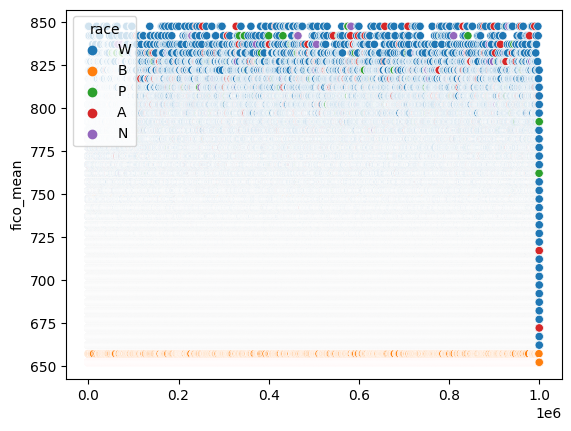

In [44]:
sns.scatterplot(data=df, x=df.index, y='fico_mean', hue='race')

In [45]:
sns.scatterplot(data=df, x=df.index, y='fico_range', hue='race')

<Axes: ylabel='fico_range'>

Error in callback <function flush_figures at 0x00000195A5AB16C0> (for post_execute):


KeyboardInterrupt: 

In [46]:
# code from chirag's notebook
print(df["requested_amnt"].corr(df["loan_paid"]))
print(df["annual_income"].corr(df["loan_paid"]))
loan_income_ratio = df["requested_amnt"] / df["annual_income"]
print(loan_income_ratio.corr(df["loan_paid"]))
df["loan_income_ratio"] = loan_income_ratio

-0.0658787777143714
0.04133225140212271
nan


In [ ]:
for col in categorical_cols:
    crosstab_result = pd.crosstab(index=df['race'], columns=df[col])
    # Performing Chi-sq test
    ChiSqRes = chi2_contingency(crosstab_result)
    print(col, ' p-value: ', ChiSqRes[1]) # p-value

type_of_application  p-value:  0.598872850556454
race  p-value:  0.0
home_ownership_status  p-value:  0.1680678308128164
employment_verified  p-value:  0.6837111491424117
reason_for_loan  p-value:  0.5791426027145052
state  p-value:  0.010921425125704647
zipcode  p-value:  0.4697358422569713
extended_reason  p-value:  0.03334756447238668


state and extended_reason are correlated w race column

In [ ]:
numeric_cols = df.select_dtypes(include=numerics).columns
df[numeric_cols].corr()

revolving_balance and total_revolving_limit very highly correlated, total_revolving limit more correlated with loan_paid, so we keep this one

same logic with months_since_last_delinq and delinquency_last_2yrs, keep the latter

In [ ]:
cat_df = df[categorical_cols]  # temp df of only categorical data

cat_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


In [ ]:
excluded = ['ID', 'months_since_last_delinq', 'revolving_balance', 'race', 'state', 'extended_reason']
included = list(set(df.columns) - set(excluded))

df = df[included]

print(df.head(5))

In [ ]:
df.info()

In [ ]:
display(df.isin([np.nan, np.inf, -np.inf]).sum())
# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column] = df[column].astype('category')
#     else:
#         df[column] = df[column].astype('int64')